In [2]:
import re

bfs_file = "/Users/sakshmenon/Desktop/PLM/Workflow Gen/Similarity Search/s_cerevisiae2s_pombe.bfs.k30.txt"

def extract_query_and_matches(text):
    text = text.split('\n')[:-1]
    query = text[0].split('\t')[1:]
    top_matches = text[1:]

    return {
        "Query": query,
        "Matches": [{"Score": match.split('\t')[1], "Protein ID": match.split('\t')[2][1:]} for match in top_matches]
    }

match_list = []
with open(bfs_file) as file_obj:
    content = file_obj.read()
    queries = content.split('\n\n')
    for query in queries[1:-1]:
        result = extract_query_and_matches(query)
        match_list.append(result)


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate some sample continuous data
np.random.seed(42)
data = np.random.normal(loc=0, scale=1, size=500)  # Normally distributed data

def plot_distribution(data):
    # Set the style for better aesthetics
    sns.set(style="whitegrid")

    # Create a figure and axes for the subplots
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    # KDE Plot
    sns.kdeplot(data, shade=True, color='purple', ax=axes[0])
    axes[0].set_title('Kernel Density Estimation (KDE)')
    axes[0].set_xlabel('Data Values')
    axes[0].set_ylabel('Density')

    # Histogram with KDE overlay
    sns.histplot(data, bins=30, kde=True, color='green', ax=axes[1])
    axes[1].set_title('Histogram with KDE')
    axes[1].set_xlabel('Data Values')
    axes[1].set_ylabel('Density')

    # Display the plots
    plt.suptitle('Distribution Plots of Continuous Data', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
    plt.show()


/var/folders/h3/pl4_4z116_dcntldrzwpn49w0000gn/T/ipykernel_82298/2831815379.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True, color='purple', ax=axes[0])


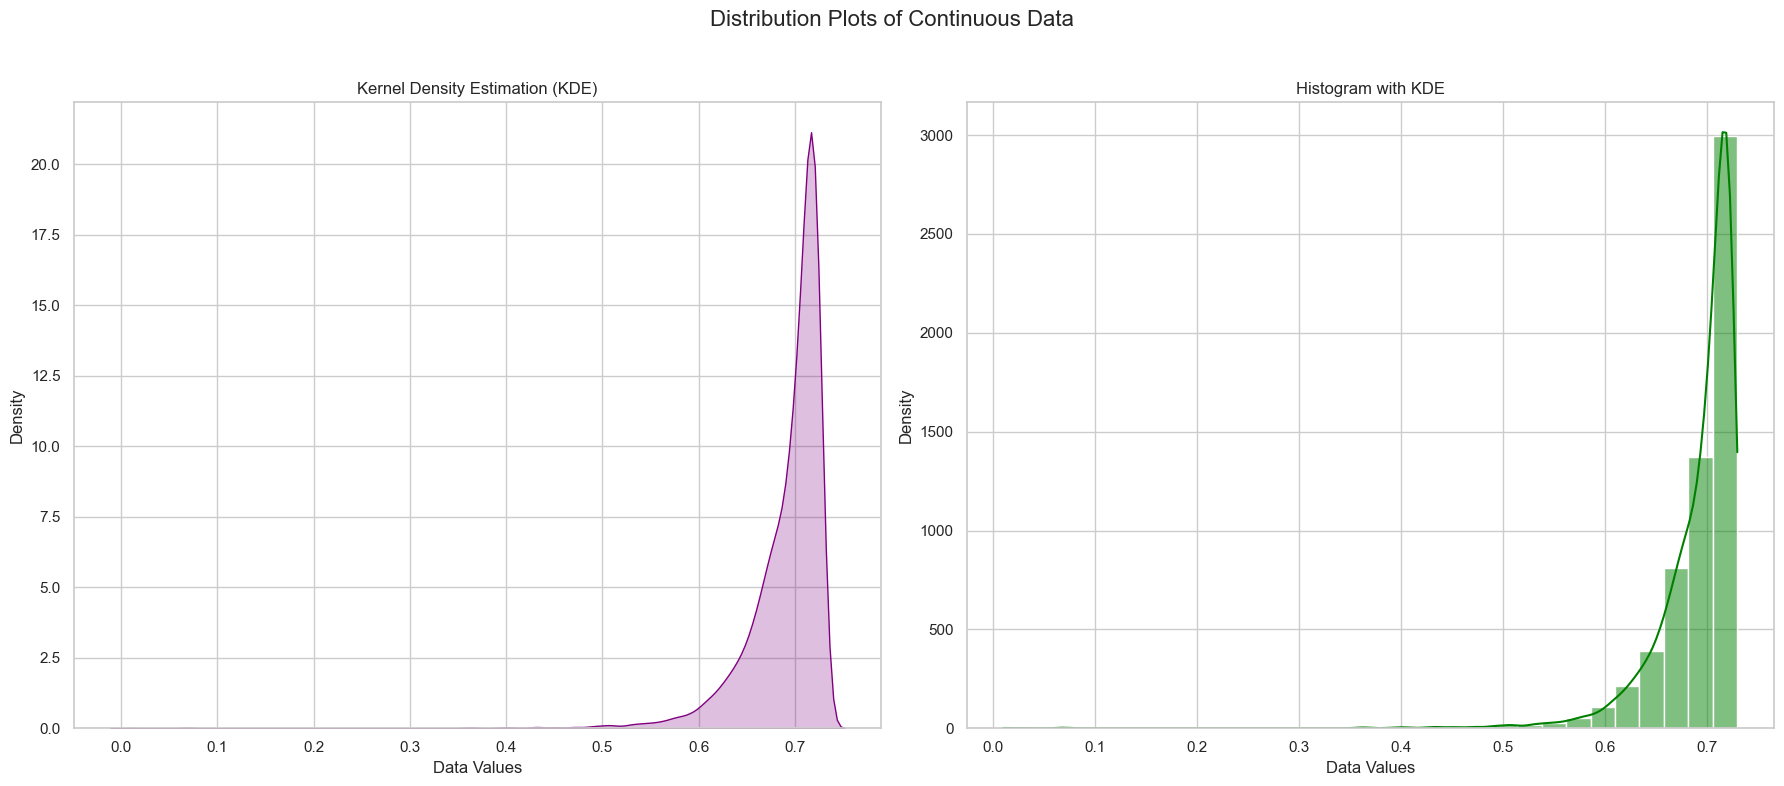

In [13]:
import math

distance_distribution_scores = []
for query in match_list:
    matches = query['Matches']
    scores = [float(set['Score']) for set in matches]
    distance_distribution_scores.append(1 - np.std(scores)/scores[0])

array = np.array(distance_distribution_scores)
array = 1/(1+math.e**-(array))

plot_distribution(array)

In [15]:
min(array)

0.010680563654878166